# Basic Lasso

In [1]:
import numpy as np 
import cvxpy as cp 
import pandas as pd 
from   tqdm import tqdm
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [2]:
def generate_data(m=100, n=20, sigma=5, density=0.2):
    "Generates data matrix X and observations Y."
    np.random.seed(1)
    beta_star = np.random.randn(n)
    idxs = np.random.choice(range(n), int((1-density)*n), replace=False)
    for idx in idxs:
        beta_star[idx] = 0
    X = np.random.randn(m,n)
    Y = X.dot(beta_star) + np.random.normal(0, sigma, size=m)
    return X, Y, beta_star

m = 100
n = 20
sigma = 5
density = 0.2

X, Y, _ = generate_data(m, n, sigma)
X_train = X[:50, :]
Y_train = Y[:50]
X_test  = X[50:, :]
Y_test  = Y[50:]


print("X_train shape :" ,X_train.shape)
print("Y_train shape :" ,Y_train.shape)
print("X_test shape :"  ,X_test.shape)
print("X_test shape :"  ,Y_test.shape)

X_train shape : (50, 20)
Y_train shape : (50,)
X_test shape : (50, 20)
X_test shape : (50,)


# Function for lasso

In [91]:
def loss_function(x,y,beta):
    """
    Ordinary Least Square Loss Function 
    """
    return  cp.norm(x @ beta - y,2)**2

def Objective_Function(x,y,beta,lambd):
    """
    OLSE Loss Function with regularization term
    """

    return loss_function(x,y,beta) + lambd * regularizer(beta)

def regularizer(beta):

    regular_term = cp.norm(beta,1)

    return regular_term 

def Mean_square_error(x,y,beta):
    
    n   = x.shape[0]
    mse = (1/n) * loss_function(x,y,beta).value
    
    return mse 

In [92]:
beta    = cp.Variable(n)
lambd   = cp.Parameter(nonneg=True)
problem = cp.Problem(cp.Minimize(Objective_Function(X_train, Y_train, beta, lambd)))

In [93]:
lambd_values = np.logspace(-2, 3, 50)
train_errors = []
test_errors  = []
beta_values  = []

print(lambd_values)

[1.00000000e-02 1.26485522e-02 1.59985872e-02 2.02358965e-02
 2.55954792e-02 3.23745754e-02 4.09491506e-02 5.17947468e-02
 6.55128557e-02 8.28642773e-02 1.04811313e-01 1.32571137e-01
 1.67683294e-01 2.12095089e-01 2.68269580e-01 3.39322177e-01
 4.29193426e-01 5.42867544e-01 6.86648845e-01 8.68511374e-01
 1.09854114e+00 1.38949549e+00 1.75751062e+00 2.22299648e+00
 2.81176870e+00 3.55648031e+00 4.49843267e+00 5.68986603e+00
 7.19685673e+00 9.10298178e+00 1.15139540e+01 1.45634848e+01
 1.84206997e+01 2.32995181e+01 2.94705170e+01 3.72759372e+01
 4.71486636e+01 5.96362332e+01 7.54312006e+01 9.54095476e+01
 1.20679264e+02 1.52641797e+02 1.93069773e+02 2.44205309e+02
 3.08884360e+02 3.90693994e+02 4.94171336e+02 6.25055193e+02
 7.90604321e+02 1.00000000e+03]


# Regularization path

In [94]:
for v in tqdm(lambd_values):
    lambd.value = v
    
    problem.solve()
    train_errors.append(Mean_square_error(X_train, Y_train, beta))
    test_errors.append(Mean_square_error(X_test, Y_test, beta))
    beta_values.append(beta.value)

  0%|          | 0/50 [00:00<?, ?it/s]/Users/chen-lichiang/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1278: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [00:00<00:00, 304.81it/s]


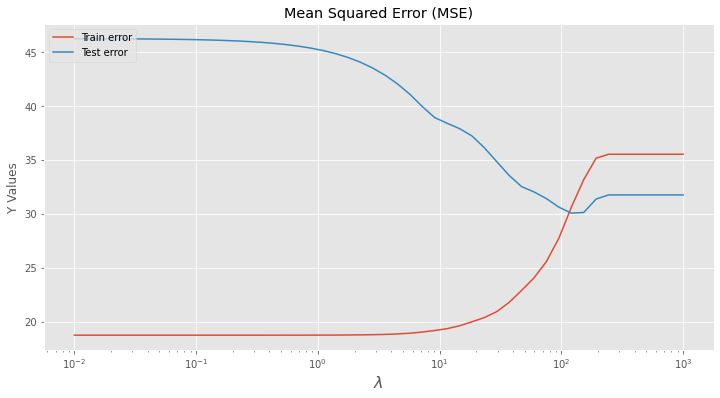

In [8]:
def plot_train_test_errors(train_errors, test_errors, lambd_values):

    fig , ax = plt.subplots(figsize=(12,6))
    ax.set_title("Mean Squared Error (MSE)")
    ax.plot(lambd_values, train_errors, label="Train error")
    ax.plot(lambd_values, test_errors, label="Test error")
    ax.set_xlabel(r"$\lambda$", fontsize=16)
    ax.set_ylabel('Y Values')
    ax.legend(loc="upper left")
    plt.xscale("log")
    plt.show()
    
plot_train_test_errors(train_errors, test_errors, lambd_values)

No handles with labels found to put in legend.


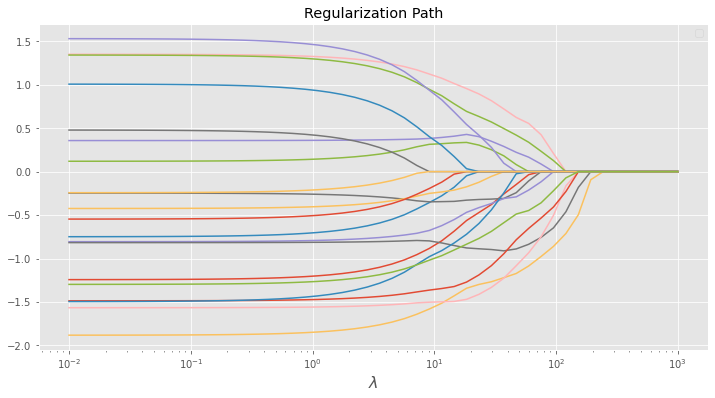

In [9]:
def plot_regularization_path(lambd_values, beta_values,feature_name=None):
    
    num_coeffs = len(beta_values[0])

    fig,ax  = plt.subplots(figsize=(12,6))
    ax.set_title("Regularization Path")
    for i in range(num_coeffs):
        ax.plot(lambd_values, [wi[i] for wi in beta_values],label=feature_name)

    ax.set_xlabel(r"$\lambda$", fontsize=16)
    ax.legend(loc="upper right")
    plt.xscale("log")
    plt.show()
    
plot_regularization_path(lambd_values, beta_values)

Compare to Ridge regression(Norm 2) ,  Redige have optimization process with lambda as variable  , will have spark issue , due to 

# Norm Constraint

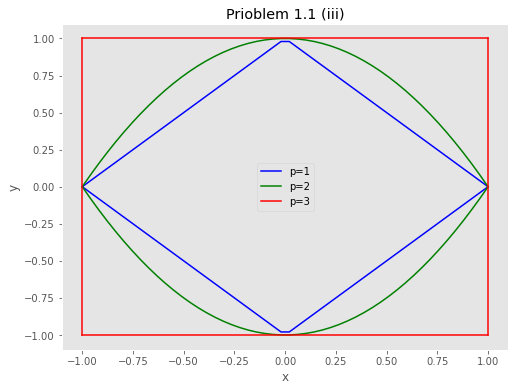

In [10]:
x = np.linspace(-1,1)

lp1_1 = [ 1-np.abs(element) for element in x ]
lp1_2 = [np.abs(element)-1  for element in x ]

lp2_1 = [ 1- np.square(element) for element in x ]
lp2_2 = [ np.square(element)-1  for element in x ]

lp3_1 = [ np.max([element,1])  for element in x ]
lp3_2 = [ np.min([element,-1]) for element in x ]


fig,ax = plt.subplots(figsize=(8,6))
ax.set_title('Prioblem 1.1 (iii)')

# p = 1 
ax.plot(x,lp1_1,color='b',label='p=1')
ax.plot(x,lp1_2,color='b')

# p = 2 
ax.plot(x,lp2_1,color='green',label='p=2')
ax.plot(x,lp2_2,color='green')

# p = 3
ax.plot(x,lp3_1,color='red',label='p=3')
ax.plot(x,lp3_2,color='red')
ax.plot(lp3_1,x,color='red')
ax.plot(lp3_2,x,color='red')

# ------
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()